In [3]:
!pip install yfinance


  Using cached yfinance-0.1.64.tar.gz (26 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24094 sha256=a749d0b52246966aff80a5b5e1321a5a711903caaaf54534f363ea9fa6d5e196
  Stored in directory: /Users/vikramjindal/Library/Caches/pip/wheels/f9/e9/7e/8b13db3bf3aeb5049d759e10702736fb96753089ac950fddc0
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=3e898b456b43a4a5642da4de5d4d4bdd7d74c325afec87c6868b37989bacf773
  Stored in directory: /Users/vikramjindal/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [132]:
!pip install hvplot

In [133]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import yfinance as yf
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
# Import hvplot
import hvplot.pandas

In [135]:
def vanguard_data(ticker):
    
    ticker = yf.Ticker(ticker)
    ticker_hist = ticker.history(period="4y")
    ticker_hist = ticker_hist.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    ticker_hist['Close'] = ticker_hist['Close'].round(2)
    
    return ticker_hist

In [136]:
#Create dataframe for Vanguard S&P 500
vanguard_sp_500 = vanguard_data("VOO")
# Create csv file for Vanguard S&P 500
vanguard_sp_500.to_csv('./Resources/vanguard_sp_500.csv')

vanguard_sp_500

,Close
Date,
2017-10-30,219.32
2017-10-31,219.57
2017-11-01,219.95
2017-11-02,220.05
2017-11-03,220.78
...,...
2021-10-25,418.75
2021-10-26,419.15
2021-10-27,417.33


In [137]:
#Create dataframe for Vanguard 2040
vanguard_2040 = vanguard_data("VFORX")
# Create csv file for Vanguard 2040
vanguard_2040.to_csv('./Resources/vanguard_2040.csv')

vanguard_2040.head()

,Close
Date,
2017-10-30,32.32
2017-10-31,32.39
2017-11-01,32.43
2017-11-02,32.46
2017-11-03,32.50


In [138]:
vanguard_2040.tail()

,Close
Date,
2021-10-25,50.19
2021-10-26,50.21
2021-10-27,49.98
2021-10-28,50.35
2021-10-29,50.23


Prepare Data

In [139]:
vanguard_2040_returns = yf.download("VFORX", start="2015-01-01", end="2021-10-26")
vanguard_2040_returns.to_csv('./Resources/vanguard_2040_daily_returs.csv')
vanguard_2040_returns.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,29.730000,29.730000,29.730000,29.730000,25.821632,0
2015-01-05,29.250000,29.250000,29.250000,29.250000,25.404734,0
2015-01-06,29.010000,29.010000,29.010000,29.010000,25.196285,0
2015-01-07,29.290001,29.290001,29.290001,29.290001,25.439478,0
2015-01-08,29.730000,29.730000,29.730000,29.730000,25.821632,0


In [140]:
vanguard_2040_returns.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-19,49.930000,49.930000,49.930000,49.930000,49.930000,0
2021-10-20,50.060001,50.060001,50.060001,50.060001,50.060001,0
2021-10-21,50.040001,50.040001,50.040001,50.040001,50.040001,0
2021-10-22,50.049999,50.049999,50.049999,50.049999,50.049999,0
2021-10-25,50.189999,50.189999,50.189999,50.189999,50.189999,0


In [141]:
vanguard_sp500_returns = yf.download("VOO", start="2015-01-01", end="2021-10-27")
vanguard_sp500_returns.to_csv('./Resources/vanguard_SP500_daily_returs.csv')
vanguard_sp500_returns.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,189.289993,189.720001,187.259995,188.399994,165.598755,1865000
2015-01-05,187.259995,187.410004,184.660004,185.089996,162.689362,2734700
2015-01-06,185.369995,185.880005,182.360001,183.270004,161.089645,2245300
2015-01-07,184.729996,185.910004,184.229996,185.559998,163.102493,2305600
2015-01-08,187.130005,189.050003,187.070007,188.820007,165.967957,1740600


In [142]:
vanguard_sp500_returns.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-20,414.739990,416.220001,414.649994,415.989990,415.989990,3208200
2021-10-21,415.380005,417.239990,414.940002,417.010010,417.010010,2579500
2021-10-22,416.579987,418.000000,414.700012,416.589996,416.589996,3648400
2021-10-25,417.640015,419.140015,415.929993,418.750000,418.750000,2511500
2021-10-26,420.269989,421.529999,418.859985,419.149994,419.149994,3085300


 ### Vanguard 2040 Risk Statistics for 3yrs,5yrs & 10yrs

In [143]:
# Set the path to fetch risk Statistics for Vanguard 2040(VFORX)
file_path = Path('./Resources/vanguard_2040_riskstatistics.csv')

# Read in the CSV as a DataFrame
vanguard_2040_riskstatistics = pd.read_csv(file_path)
# Display
vanguard_2040_riskstatistics

,Risk_Statistics,VFORX_3yrs,Category_Average_3yrs,VFORX_5yrs,Category_Average_5yrs,VFORX_10yrs,Category_Average_10yrs
0,Alpha,-1.11,-0.01,-0.13,-0.01,-0.43,-0.01
1,Beta,1.35,0.01,1.35,0.01,1.40,0.01
2,Mean Annual Return,1.14,0.01,1.11,0.01,0.89,0.01
3,R-squared,99.16,0.98,98.97,0.98,98.20,0.97
4,Standard Deviation,15.39,0.15,12.42,0.13,12.01,0.12
5,Sharpe Ratio,0.81,0.01,0.98,0.01,0.84,0.01
6,Treynor Ratio,8.96,0.09,9.00,0.09,7.00,0.07


### Vanguard SP500 Risk Statistics for 3yrs, 5yrs & 10 yrs

In [144]:
# Set the path to fetch risk Statistics for Vanguard SP500 ETF(VOO)
file_path = Path('./Resources/vanguard_SP500_riskstatistics.csv')

# Read in the CSV as a DataFrame
vanguard_SP500_riskstatistics = pd.read_csv(file_path)
# Display
vanguard_SP500_riskstatistics

,Risk_Statistics,VOO_3yrs,Category_Average_3yrs,VOO_5yrs,Category_Average_5yrs,VOO_10yrs,Category_Average_10yrs
0,Alpha,-0.03,-0.65,-0.04,-0.48,-0.04,0.15
1,Beta,1.00,0.98,1.00,1.00,1.00,1.00
2,Mean Annual Return,1.58,0.86,1.45,1.28,1.23,0.69
3,R-squared,100.00,94.06,100.00,95.34,100.00,96.99
4,Standard Deviation,18.53,10.90,14.99,11.38,13.59,15.42
5,Sharpe Ratio,0.95,0.94,1.08,1.34,1.04,0.48
6,Treynor Ratio,17.41,10.38,16.46,15.73,14.19,6.54


### Plot the graph for the Risk Statistics of vanguard_sp500(VOO)

In [145]:
## Set the X & Y axis 
vanguard_sp500 = pd.DataFrame({'Risk':vanguard_SP500_riskstatistics.Risk_Statistics,'3': vanguard_SP500_riskstatistics.VOO_3yrs,'5': vanguard_SP500_riskstatistics.VOO_5yrs,'10': vanguard_SP500_riskstatistics.VOO_10yrs })
vanguard_sp500

,Risk,3,5,10
0,Alpha,-0.03,-0.04,-0.04
1,Beta,1.00,1.00,1.00
2,Mean Annual Return,1.58,1.45,1.23
3,R-squared,100.00,100.00,100.00
4,Standard Deviation,18.53,14.99,13.59
5,Sharpe Ratio,0.95,1.08,1.04
6,Treynor Ratio,17.41,16.46,14.19


In [146]:
# Set Index
vanguard_sp500.set_index('Risk')

,3,5,10
Risk,,,
Alpha,-0.03,-0.04,-0.04
Beta,1.00,1.00,1.00
Mean Annual Return,1.58,1.45,1.23
R-squared,100.00,100.00,100.00
Standard Deviation,18.53,14.99,13.59
Sharpe Ratio,0.95,1.08,1.04
Treynor Ratio,17.41,16.46,14.19


In [147]:
# Set Index
vanguard_sp500.set_index('Risk')

,3,5,10
Risk,,,
Alpha,-0.03,-0.04,-0.04
Beta,1.00,1.00,1.00
Mean Annual Return,1.58,1.45,1.23
R-squared,100.00,100.00,100.00
Standard Deviation,18.53,14.99,13.59
Sharpe Ratio,0.95,1.08,1.04
Treynor Ratio,17.41,16.46,14.19


In [148]:
## Plot the vanguard sp500 Risk line graph for 3,5 & 10 yrs
vanguard_sp500.hvplot.line(x='Risk', 
                    y=['3', '5', '10'], 
                    width=800, 
                    height=600,  
                    title='Risk Statistics Vanguard S&P 500 ETF',
                    ylim=(-2,100),
                    xlabel='Time Period 3 yrs, 5yrs & 10yrs',
                    ylabel='Risk Value',
                    grid=True)

:NdOverlay   [Variable]
   :Curve   [Risk]   (value)

In [149]:
## Plot the vanguard sp500 Risk bar graph for 3,5,10 yrs
vanguard_sp500.hvplot.bar(x='Risk', 
                    y=['3', '5', '10'], 
                    width=700, 
                    height=400,  
                    title='Risk Statistics Vanguard S&P 500 ETF',
                    ylim=(-2,100),
                    xlabel='Time Period 3 yrs, 5yrs & 10yrs ',
                    ylabel='Risk Value',
                    grid=True)

:Bars   [Risk,Variable]   (value)

### Plot the graph for the Risk Statistics of vanguard_2040(VFORX)

In [150]:
## Set the X & Y axis 
vanguard_2040 = pd.DataFrame({'Risk':vanguard_2040_riskstatistics.Risk_Statistics,'3': vanguard_2040_riskstatistics.VFORX_3yrs,'5': vanguard_2040_riskstatistics.VFORX_5yrs,'10': vanguard_2040_riskstatistics.VFORX_10yrs })
vanguard_2040

,Risk,3,5,10
0,Alpha,-1.11,-0.13,-0.43
1,Beta,1.35,1.35,1.40
2,Mean Annual Return,1.14,1.11,0.89
3,R-squared,99.16,98.97,98.20
4,Standard Deviation,15.39,12.42,12.01
5,Sharpe Ratio,0.81,0.98,0.84
6,Treynor Ratio,8.96,9.00,7.00


In [151]:
# Set Index
vanguard_2040.set_index('Risk')

,3,5,10
Risk,,,
Alpha,-1.11,-0.13,-0.43
Beta,1.35,1.35,1.40
Mean Annual Return,1.14,1.11,0.89
R-squared,99.16,98.97,98.20
Standard Deviation,15.39,12.42,12.01
Sharpe Ratio,0.81,0.98,0.84
Treynor Ratio,8.96,9.00,7.00


In [152]:
## Plot the vanguard Target Retirement 2040 fund Risk statistics line graph for 3,5 & 10 yrs
vanguard_2040.hvplot.line(x='Risk', 
                    y=['3', '5', '10'], 
                    width=800, 
                    height=600,  
                    title='Risk Statistics of Vanguard Target Retirement 2040 Fund',
                    ylim=(-2,100),
                    xlabel='Time Period 3 yrs, 5yrs & 10yrs',
                    ylabel='Risk Value',
                    grid=True)

:NdOverlay   [Variable]
   :Curve   [Risk]   (value)

In [153]:
## Plot the vanguard Target Retirement 2040 fund  Risk Statistics bar graph for 3,5 & 10 yrs
vanguard_2040.hvplot.line(x='Risk', 
                    y=['3', '5', '10'], 
                    width=800, 
                    height=600,  
                    title='Risk Statistics of Vanguard Target Retirement 2040 Fund',
                    ylim=(-2,100),
                    xlabel='Time Period 3 yrs, 5yrs & 10yrs',
                    ylabel='Risk Value',
                    grid=True)

:NdOverlay   [Variable]
   :Curve   [Risk]   (value)

### Vanguard S&P 500 Predictions

In [154]:
## Obtain the vangauard sp500 ETF from the CSV
vanguard_sp500_path = Path('./Resources/vanguard_SP500_daily_returs.csv')
vanguard_sp500_df = pd.read_csv(vanguard_sp500_path, parse_dates=True, index_col='Date')

In [155]:
vanguard_sp500_df['Return'] = vanguard_sp500_df.Close.pct_change() * 100
vanguard_sp500_df['Lagged_Return'] = vanguard_sp500_df.Return.shift()
vanguard_sp500_df = vanguard_sp500_df.dropna()
vanguard_sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2015-01-06,185.369995,185.880005,182.360001,183.270004,161.089645,2245300,-0.983301,-1.756899
2015-01-07,184.729996,185.910004,184.229996,185.559998,163.102493,2305600,1.249519,-0.983301
2015-01-08,187.130005,189.050003,187.070007,188.820007,165.967957,1740600,1.756849,1.249519
2015-01-09,189.300003,189.339996,186.649994,187.229996,164.570389,2525200,-0.842078,1.756849
2015-01-12,187.460007,187.600006,185.190002,185.839996,163.348587,1847500,-0.742402,-0.842078


### Slice the data into Training and Testing data

In [156]:
train_vanguard_sp500 = vanguard_sp500_df.loc['2016':'2020']

test_vanguard_sp500 = vanguard_sp500_df.loc['2021']

In [157]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_vanguard_sp500_train = train_vanguard_sp500["Lagged_Return"].to_frame()
X_vanguard_sp500_test = test_vanguard_sp500["Lagged_Return"].to_frame()
y_vanguard_sp500_train = train_vanguard_sp500["Return"]
y_vanguard_sp500_test = test_vanguard_sp500["Return"]

In [158]:
X_vanguard_sp500_train.head()

,Lagged_Return
Date,
2016-01-04,-0.990472
2016-01-05,-1.401592
2016-01-06,0.179047
2016-01-07,-1.267329
2016-01-08,-2.435547


In [175]:
y_vanguard_sp500_train.head()

Date
2016-01-04   -1.401592
2016-01-05    0.179047
2016-01-06   -1.267329
2016-01-07   -2.435547
2016-01-08   -1.062633
Name: Return, dtype: float64

### Fit the model to the Training Data

In [176]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_vanguard_sp500_train, y_vanguard_sp500_train)

LinearRegression()

### Make predictions using the Testing Data

In [177]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_vanguard_sp500_test)

In [178]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results_vanguard_sp500 = y_vanguard_sp500_test.to_frame()
Results_vanguard_sp500["Predicted Return"] = predictions

In [179]:
Results_vanguard_sp500.head(10)

,Return,Predicted Return
Date,,
2021-01-04,-1.355874,-0.057415
2021-01-05,0.657762,0.385706
2021-01-06,0.606569,-0.085375
2021-01-07,1.494191,-0.073399
2021-01-08,0.562481,-0.281054
2021-01-11,-0.653504,-0.063085
2021-01-12,0.008617,0.221389
2021-01-13,0.249884,0.066489
2021-01-14,-0.338078,0.010046


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0051828b0>,
      dtype=object)

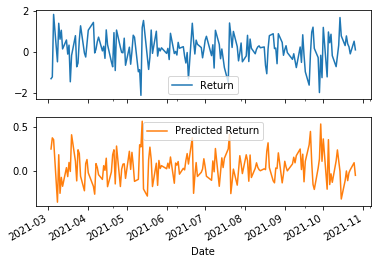

In [180]:
# Plot the post 40 predictions and actual returns separetely
# The trends lines should be similar
Results_vanguard_sp500[40:].plot(subplots=True)

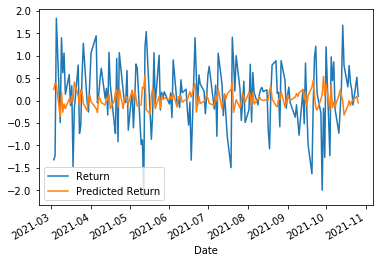

In [181]:
# Plot the post 40 predictions against the true values in the same plot to see how it performed
# The lines should be as close as possible
Results_vanguard_sp500[40:].plot()

In [182]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results_vanguard_sp500["Return"],
    Results_vanguard_sp500["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.8024427377848183


In [183]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_vanguard_sp500_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_vanguard_sp500_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 1.175842035824281


In [184]:
##hvplot.help('bar')

## Vanguard Target Retirement 2040 fund Predictions

In [185]:
## Obtain the vangauard Target Retirement 2040 fund from the CSV
vanguard_2040_path = Path('./Resources/vanguard_2040_daily_returs.csv')
vanguard_2040_df = pd.read_csv(vanguard_2040_path, parse_dates=True, index_col='Date')

In [186]:
## Calculate and Add the return & Lagged Return column to the dataframe
vanguard_2040_df['Return'] = vanguard_2040_df.Close.pct_change() * 100
vanguard_2040_df['Lagged_Return'] = vanguard_2040_df.Return.shift()
vanguard_2040_df = vanguard_2040_df.dropna()
vanguard_2040_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2015-01-06,29.010000,29.010000,29.010000,29.010000,25.196285,0,-0.820512,-1.614529
2015-01-07,29.290001,29.290001,29.290001,29.290001,25.439478,0,0.965187,-0.820512
2015-01-08,29.730000,29.730000,29.730000,29.730000,25.821632,0,1.502214,0.965187
2015-01-09,29.540001,29.540001,29.540001,29.540001,25.656612,0,-0.639080,1.502214
2015-01-12,29.389999,29.389999,29.389999,29.389999,25.526329,0,-0.507791,-0.639080


### Slice the data into Training and Testing data

In [187]:
train_vanguard_2040 = vanguard_2040_df.loc['2016':'2020']

test_vanguard_2040 = vanguard_2040_df.loc['2021']

In [188]:
# Create dataframes for X_train and X_test
# Create series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_vanguard_2040_train = train_vanguard_2040["Lagged_Return"].to_frame()
X_vanguard_2040_test = test_vanguard_2040["Lagged_Return"].to_frame()
y_vanguard_2040_train = train_vanguard_2040["Return"]
y_vanguard_2040_test = test_vanguard_2040["Return"]

In [189]:
X_vanguard_2040_train.head()

,Lagged_Return
Date,
2016-01-04,-0.767350
2016-01-05,-1.476274
2016-01-06,0.035677
2016-01-07,-1.176897
2016-01-08,-2.020929


In [174]:
y_vanguard_2040_train.head()

Date
2016-01-04   -1.476274
2016-01-05    0.035677
2016-01-06   -1.176897
2016-01-07   -2.020929
2016-01-08   -0.957644
Name: Return, dtype: float64

### Fit the model to the Training Data

In [190]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_vanguard_2040_train, y_vanguard_2040_train)

LinearRegression()

### Make predictions using the Testing Data

In [191]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_vanguard_2040_test)

In [192]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results_vanguard_2040 = y_vanguard_2040_test.to_frame()
Results_vanguard_2040["Predicted Return"] = predictions

In [193]:
Results_vanguard_2040.head(10)

,Return,Predicted Return
Date,,
2021-01-04,-0.632480,0.015030
2021-01-05,0.841098,0.156428
2021-01-06,0.450858,-0.099695
2021-01-07,0.964992,-0.031868
2021-01-08,0.600126,-0.121230
2021-01-11,-0.640736,-0.057812
2021-01-12,0.355792,0.157863
2021-01-13,0.088626,-0.015344
2021-01-14,0.154978,0.031092


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd004c2f400>,
      dtype=object)

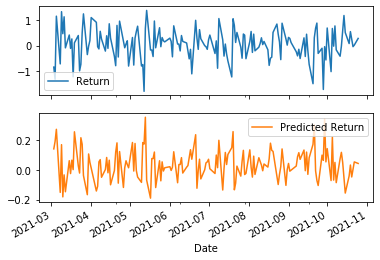

In [194]:
# Plot the post 40 predictions and actual returns separetely
# The trends lines should be similar
Results_vanguard_2040[40:].plot(subplots=True)

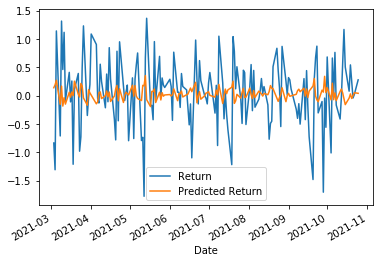

In [195]:
# Plot the post 40 predictions against the true values in the same plot to see how it performed
# The lines should be as close as possible
Results_vanguard_2040[40:].plot()

In [196]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    Results_vanguard_2040["Return"],
    Results_vanguard_2040["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.6386845307976418


In [197]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_vanguard_2040_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_vanguard_2040_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.9400404842482671
